# HARRY POTTER CLASSIFIER

In [12]:
import pandas as pd
from prepare_training_data import prepare_splits, train_all_models, evaluate_all
# from decision_tree_model import train_and_visualize_trees, evaluate_models
from visualize import visualize_all, plot_class_distributions, plot_original_distribution, analyze_accuracy_vs_depth

In [13]:
data_path = "Data/harry_potter_students.csv"
hp_df = pd.read_csv(data_path)
hp_df.shape

(1000, 10)

In [15]:
feature = hp_df.drop(['House'], axis=1)
for col in feature.columns:
    if feature[col].dtypes == 'object':
        feature[col] = feature[col].apply(lambda x: hash(x) % 1000)
label = hp_df['House']

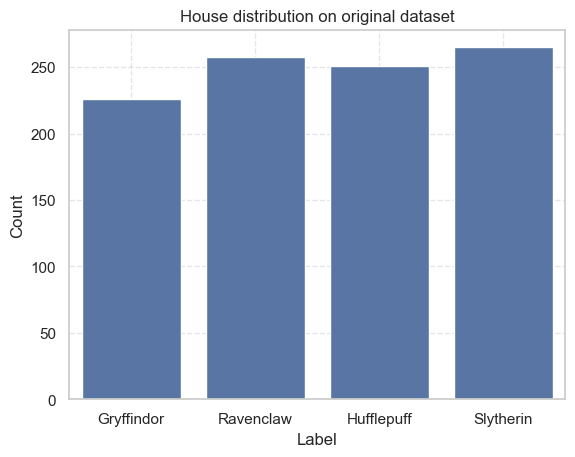

In [23]:
plot_original_distribution(label, "House distribution on original dataset")

In [18]:
split_portions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
data_sets =  prepare_splits(feature, label, split_portions)

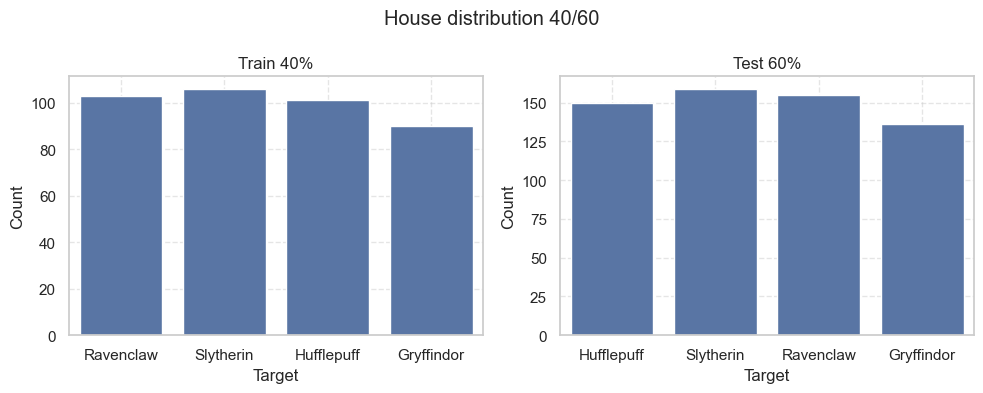

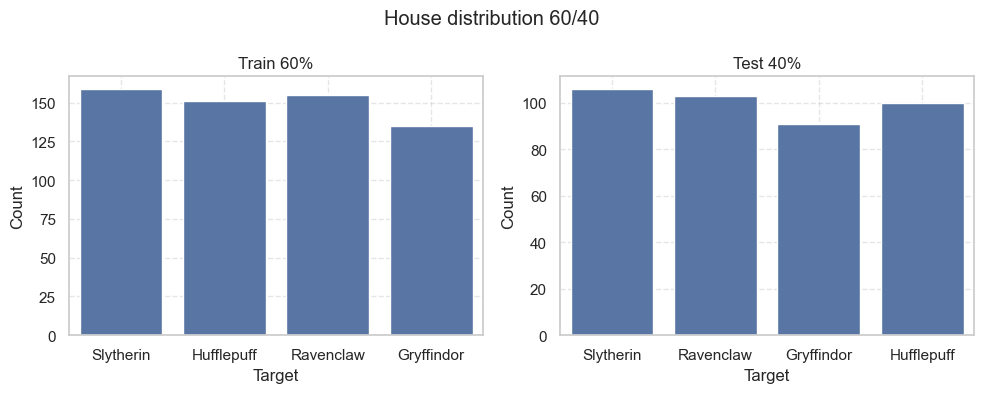

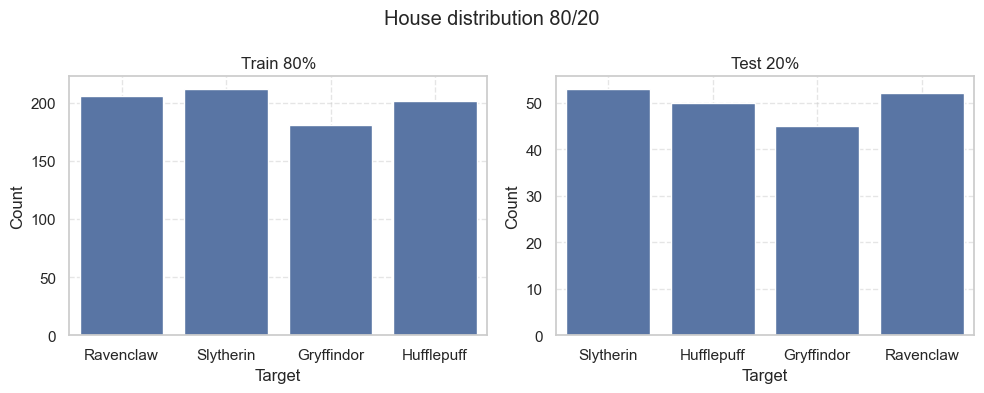

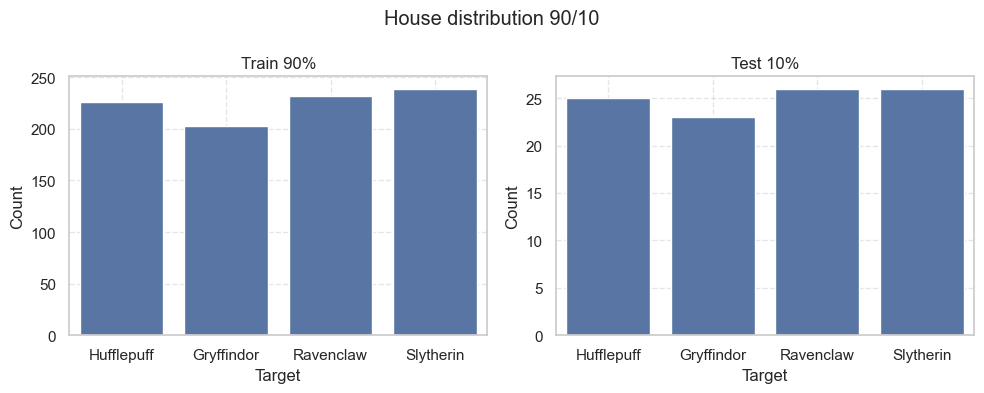

In [19]:
plot_class_distributions(data_sets, split_portions, "House distribution")

🌲 Tree 1


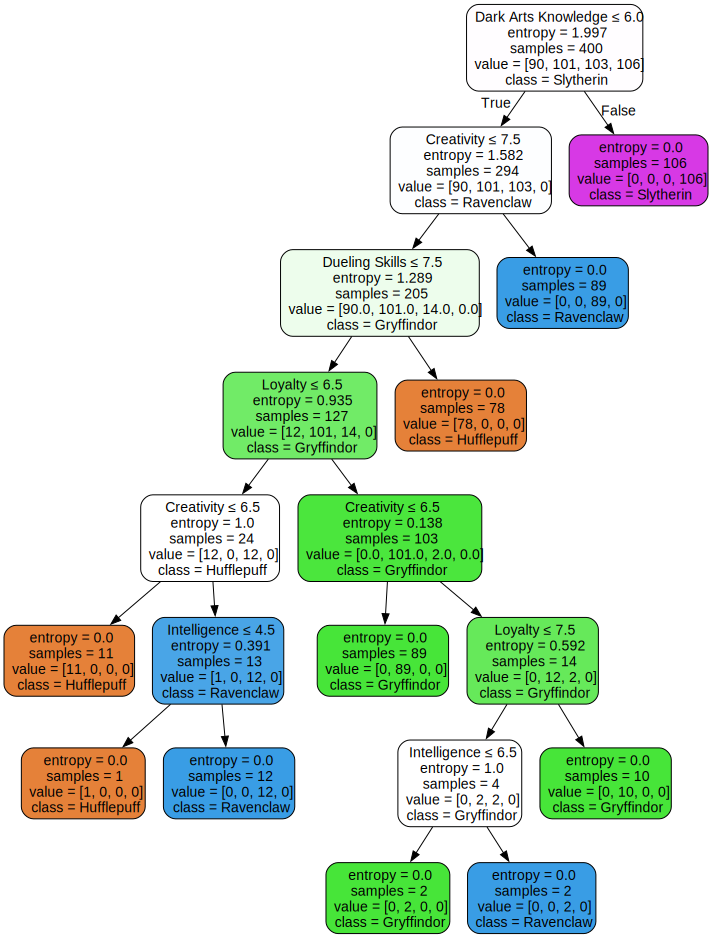

🌲 Tree 2


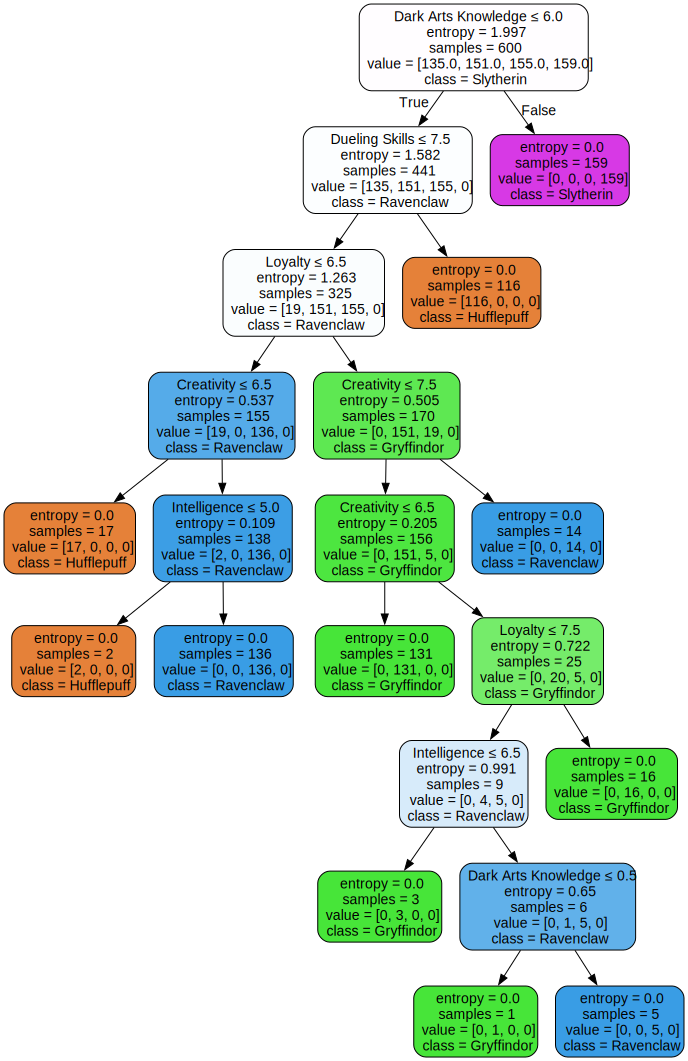

🌲 Tree 3


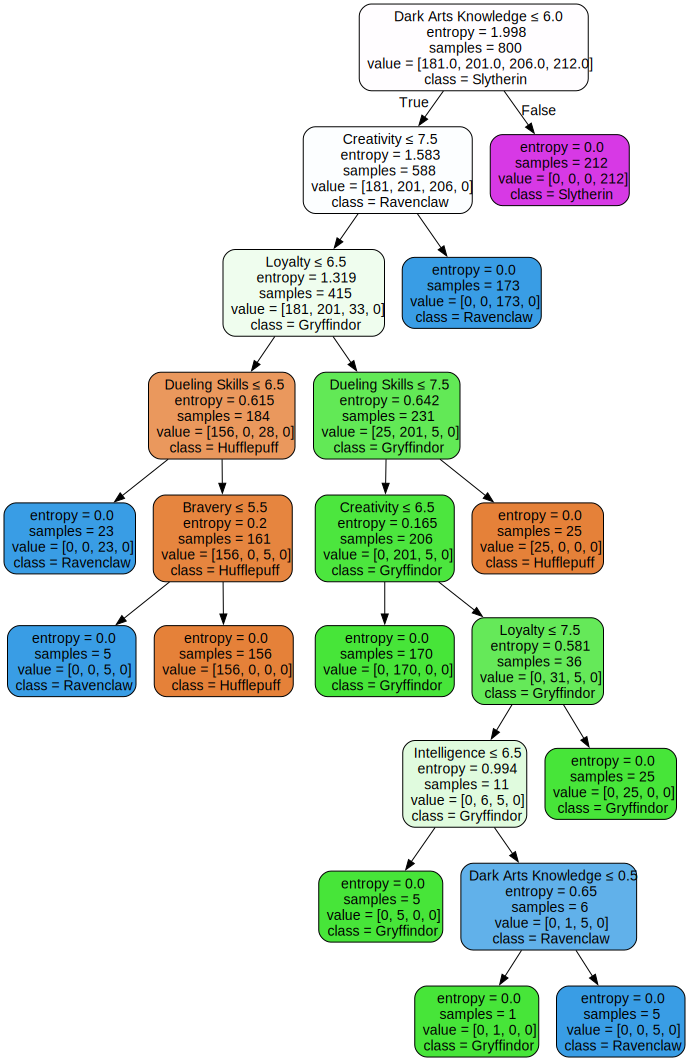

🌲 Tree 4


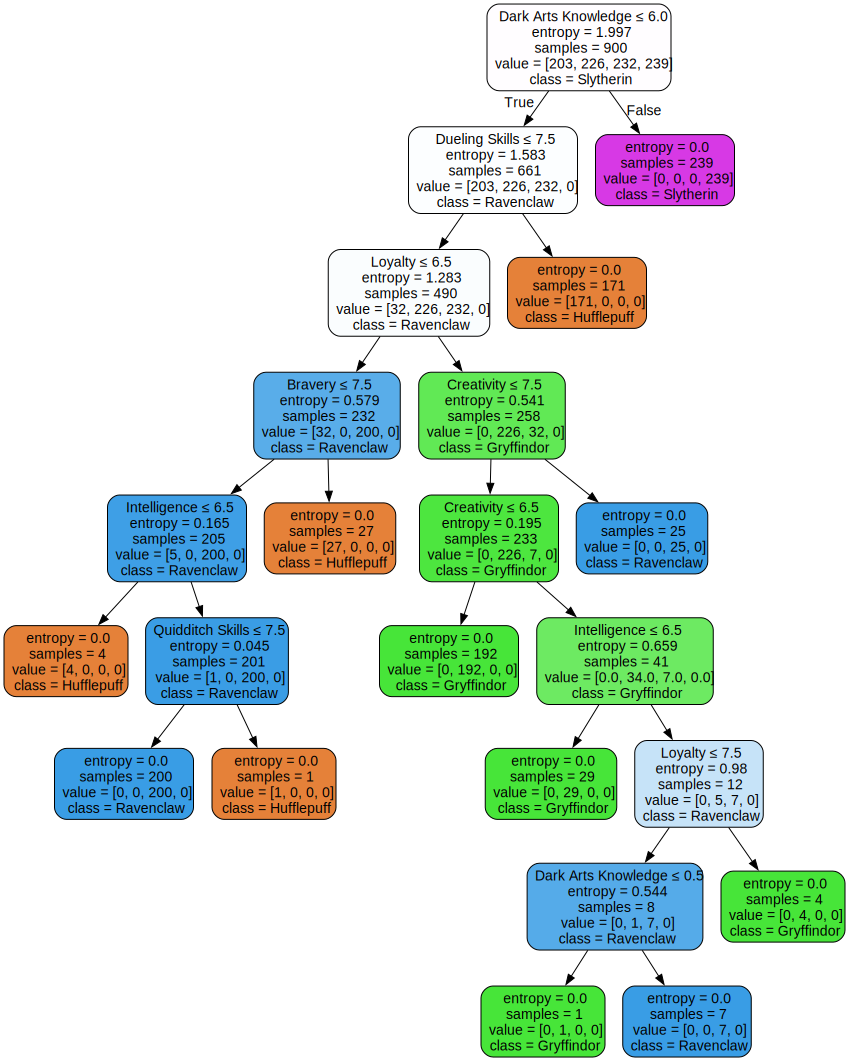

In [20]:
# train data
clfs = train_all_models(data_sets)
# visualize the trees based on trained models of datasets (clfs)
visualize_all(clfs, feature_names=feature.columns.tolist(), class_names=["Hufflepuff", "Gryffindor", "Ravenclaw", "Slytherin"])

🌲 Decision Tree with max_depth = None, Accuracy = 0.9900


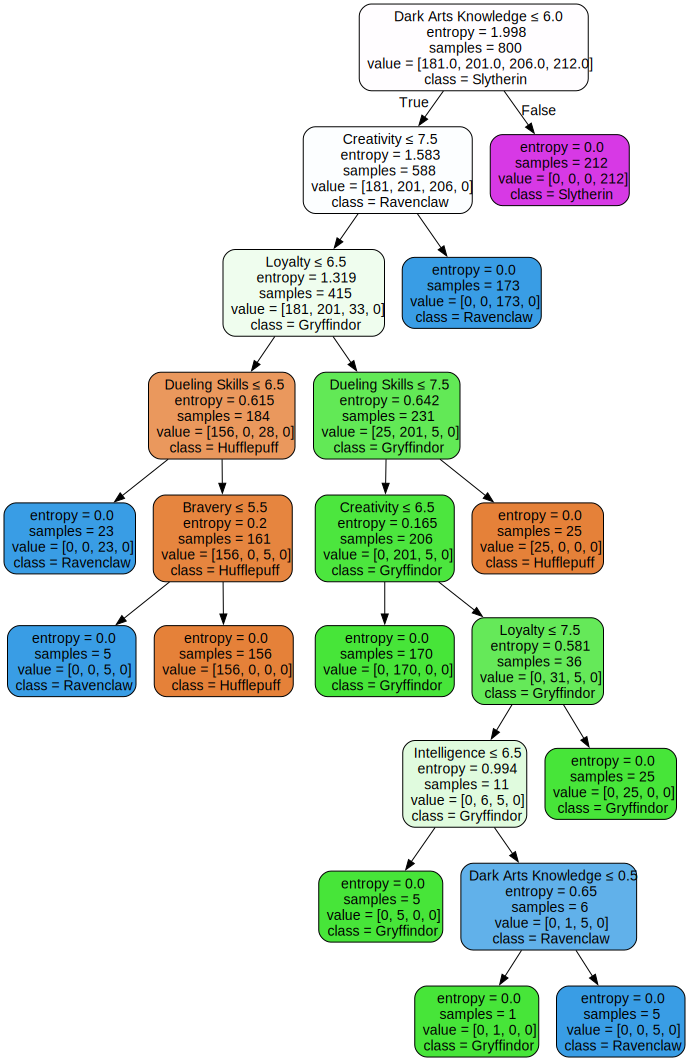

🌲 Decision Tree with max_depth = 2, Accuracy = 0.6900


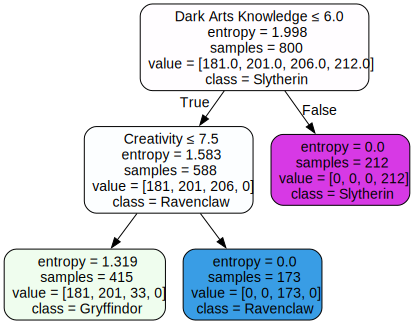

🌲 Decision Tree with max_depth = 3, Accuracy = 0.8750


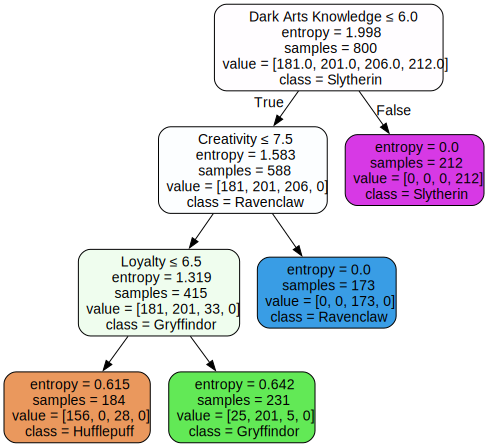

🌲 Decision Tree with max_depth = 4, Accuracy = 0.9650


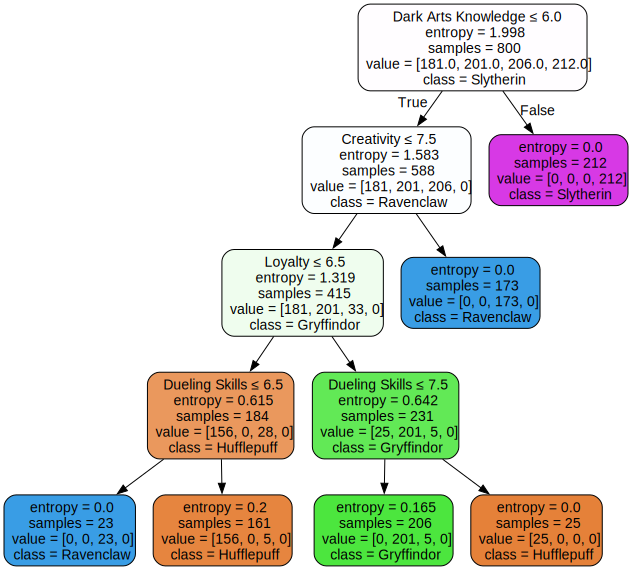

🌲 Decision Tree with max_depth = 5, Accuracy = 0.9700


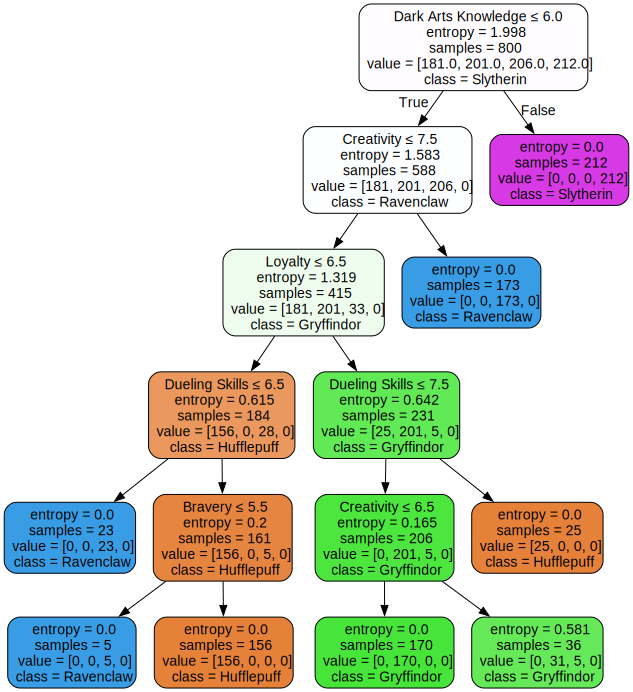

🌲 Decision Tree with max_depth = 6, Accuracy = 0.9700


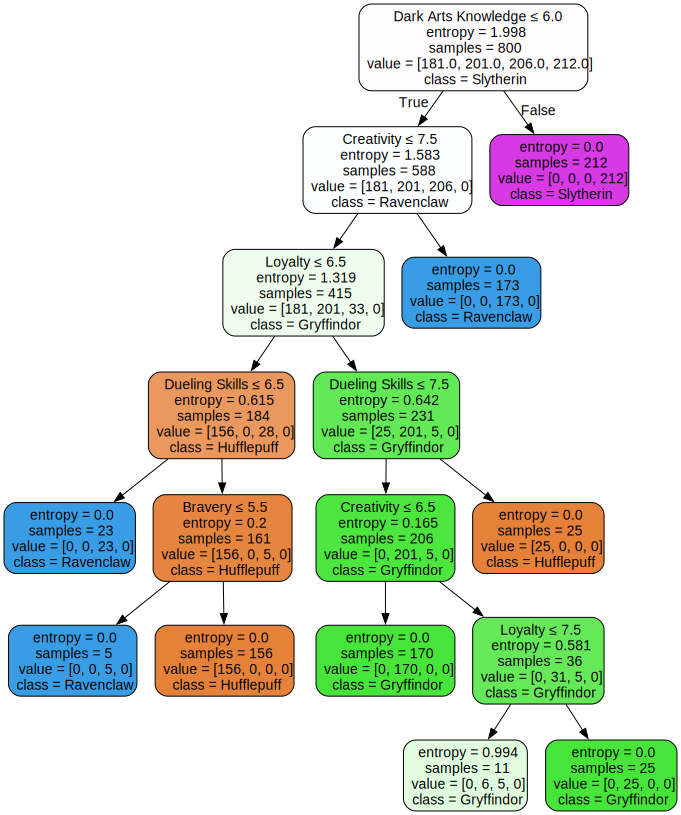

🌲 Decision Tree with max_depth = 7, Accuracy = 0.9950


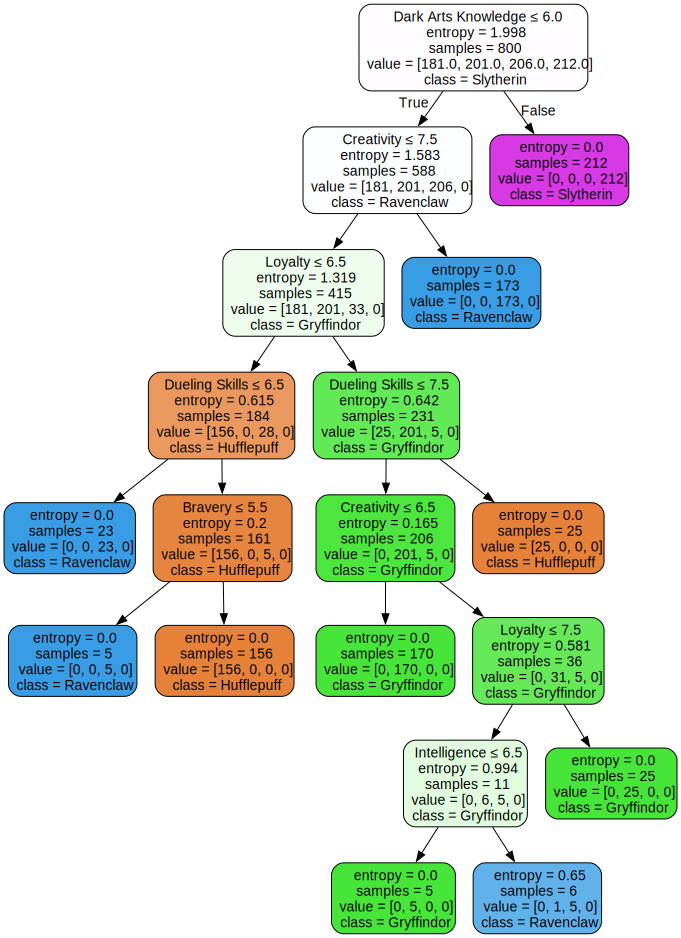

In [24]:
result = analyze_accuracy_vs_depth(data_sets[2], feature.columns.tolist(), class_names=["Hufflepuff", "Gryffindor", "Ravenclaw", "Slytherin"])